In [ ]:
# Install/upgrade wikipedia and statsmodels packages for the lab
!pip install wikipedia
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Question 1**

---

Load CSV file "timeseries.csv", which contains a univariate timeseries. Once loaded, convert the timeseries into a numpy array and use the numpy flatten() function to ensure that the loaded timeseries is one-dimensional. Compute the Discrete Fourier Transform (DFT) of the timeseries, and display plots for both the original timeseries and the magnitude of its DFT. How many predominant frequency components does the timeseries have?

**Solution**

---

*Original Timeseries*

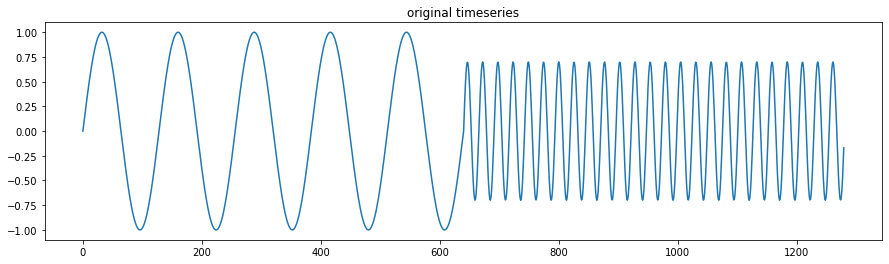

In [ ]:
import numpy as np
from numpy import genfromtxt 
import matplotlib.pyplot as plt

my_data = genfromtxt('timeseries.csv')
timedata = np.array(my_data)

#Returns a copy of the array collapsed into one dimension. 
N = timedata.flatten()

plt.figure(figsize=(15, 4)) 
plt.title('original timeseries') 
plt.plot(N)

*Discrete Fourier Transform (DFT) of the timeseries*

Text(0.5, 0, 'Frequency (index $k$)')

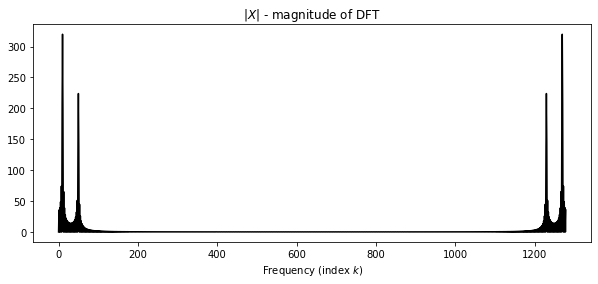

In [ ]:
# numpy implementation of FFT 
Xfft = np.fft.fft(N)

# Plot
plt.figure(figsize=(10, 4)) 
plt.title('$|X|$ - magnitude of DFT') 
plt.plot(np.abs(Xfft), 'k') 
plt.xlabel('Frequency (index $k$)')

The above figure is symmetric. There are two predominant frequencies and corresponding period.

**Question 2**

---

Using the daily births dataset, smooth the timeseries using trailing moving average smoothing and a window size that corresponds to one week; then replace any NaN values with zeros. Perform timeseries forecasting using the smoothed dataset in order to predict daily births for the first 5 days of 1960, using the models below. Show your forecasting results.

**Solution**

---

*Import daily births dataset use trailing moving average smoothing and a window size that corresponds to one week and replace any NaN values with zeros.*

In [ ]:
from pandas import read_csv
series = read_csv('births.csv', header=0, index_col=0)
rolling = series.rolling(window=7) # using a window of 7 samples: t, t-1, t-2
rolling_mean = rolling.mean() 
rolling_clean = rolling_mean.fillna(0) 
display(rolling_clean)

,Births
Date,
1959-01-01,0.000000
1959-01-02,0.000000
1959-01-03,0.000000
1959-01-04,0.000000
1959-01-05,0.000000
...,...
1959-12-27,40.714286
1959-12-28,40.571429
1959-12-29,41.857143


*Predict daily births for the first 5 days of 1960 using AR model*

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

# Fit Autoregressive model
model = AutoReg(rolling_clean, lags=2,old_names=False) # "lags" i ndicates the model order
model_fit = model.fit()

# Make prediction
yhat = model_fit.predict(len(rolling_clean), len(rolling_clean)+4 ) # arguments denote which dataset indices to predict
print(yhat)

1960-01-01    45.380177
1960-01-02    44.960852
1960-01-03    44.590676
1960-01-04    44.271699
1960-01-05    43.997395
Freq: D, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


*Predict daily births for the first 5 days of 1960 using ARMA model*

In [ ]:
from statsmodels.tsa.arima.model import ARIMA 

# Fit ARMA model
model = ARIMA(rolling_clean, order=(2, 0, 2)) # p=2, q=2
model_fit = model.fit()
# Make prediction
yhat = model_fit.predict(len(rolling_clean), len(rolling_clean)+4) # arguments denote which dataset indices to predict
print(yhat)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


1960-01-01    45.810249
1960-01-02    45.818769
1960-01-03    45.728097
1960-01-04    45.564022
1960-01-05    45.347312
Freq: D, Name: predicted_mean, dtype: float64


**Question 3**

---

Perform document clustering using k-means on the following wikipedia articles: supervised learning, unsupervised learning, semi-supervised learning, association rule learning, anomaly detection, cluster analysis, dimensionality reduction, regression analysis, statistical classification, data mining, data warehouse, online analytical processing. As with section 1, use the elbow metric to find an appropriate number of clusters. Discuss and display the document clustering results.

Solution

---



loading content:  supervised learning
loading content:  unsupervised learning
loading content:  semi-supervised learning
loading content:  association rule learning
loading content:  anomaly detection
loading content:  cluster analysis
loading content:  dimensionality reduction
loading content:  regression analysis
loading content:  statistical classification
loading content:  data mining
loading content:  data warehouse
loading content:  online analytical processing


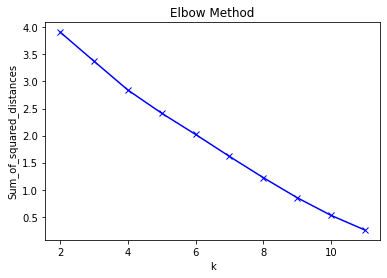

In [13]:
import pandas as pd
import wikipedia

articles=['supervised learning', 'unsupervised learning', 'semi-supervised learning', 'association rule learning', 'anomaly detection', 'cluster analysis', 'dimensionality reduction', 'regression analysis','statistical classification', 'data mining', 'data warehouse', 'online analytical processing']
wiki_lst=[] 
title=[]
# Load wikipedia articles
for article in articles: 
  print("loading content: ",article)
  wiki_lst.append(wikipedia.page(article, auto_suggest=False).content) 
  title.append(article)

from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(stop_words={'english'}) 
X = vectorizer.fit_transform(wiki_lst) # Create tf- idf feature of the wikipedia dataset

Sum_of_squared_distances = []
K = range(2,12)

for k in K:
  km = KMeans(n_clusters=k, max_iter=200, n_init=10) 
  km = km.fit(X)
  Sum_of_squared_distances.append(km.inertia_)
  
plt.plot(K, Sum_of_squared_distances, 'bx-') 
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances') 
plt.title('Elbow Method')
plt.show()

In [16]:
# Fit k-means model with k=4
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10) 
model.fit(X)

# Print list of documents and associated clusters
labels=model.labels_ 
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                           title  cluster
0            supervised learning        0
2       semi-supervised learning        0
7            regression analysis        0
9                    data mining        1
10                data warehouse        1
11  online analytical processing        1
1          unsupervised learning        2
3      association rule learning        2
5               cluster analysis        2
6       dimensionality reduction        2
8     statistical classification        2
4              anomaly detection        3


**Conclusions:** I used the elbow metric with k range(2,12), because there are 12 articles. By looking at the elbow metric plot, it is almost a straight line, because the articles are not quite enough. However, at a closer inspection a small dent is discerned in k = 4. So, I tried to cluster into 4 groups. Finally, as I see, the clustering produced by k-means is not perfect; some decisions are reasonable (e.g. data mining, data warehouse and online analytical processing are in the same cluster), some not so much (e.g. dimensionality reduction is in the same cluster with unsupervised learning). The clustering depends on the initialization of neighbours, because every time I run it, it gets slightly different result.